In [ ]:
!pip install -q librosa soundfile

In [ ]:
#Imports & helper functions
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# plotting defaults (matplotlib)
plt.rcParams['figure.figsize'] = (12, 4)

In [ ]:
root = "/content/drive/MyDrive/irmas/IRMAS-TrainingData"

#3 instrument folders to pick
instruments = ['cel', 'cla', 'flu']
# Validate they exist
for inst in instruments:
    p = os.path.join(root, inst)
    if not os.path.isdir(p):
        raise FileNotFoundError(f"Folder not found: {p}")
print("Folders exist. We'll pick one audio from each.")

Folders exist. We'll pick one audio from each.


In [ ]:
#Picking one audio file from each instrument
files = {}
for inst in instruments:
    pattern = os.path.join(root, inst, '*.wav')
    wavs = sorted(glob.glob(pattern))
    # fallback to mp3 if no wav
    if not wavs:
        wavs = sorted(glob.glob(os.path.join(root, inst, '*.mp3')))
    if not wavs:
        raise FileNotFoundError(f"No audio found in {inst} (searched .wav/.mp3).")
    files[inst] = wavs[0]  # pick the first file
    print(inst, "->", files[inst])

cel -> /content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__1.wav
cla -> /content/drive/MyDrive/irmas/IRMAS-TrainingData/cla/004__[cla][nod][cla]0242__1.wav
flu -> /content/drive/MyDrive/irmas/IRMAS-TrainingData/flu/008__[flu][nod][cla]0393__1.wav


In [ ]:
#Parameters for STFT and mel
sr = 22050  # target sampling rate
n_fft = 2048
hop_length = 512
n_mels = 128

In [ ]:
#Function to compute and plot waveform, STFT (dB), and mel-spectrogram (dB)
def analyze_and_plot(filepath, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels):
    y, sr_used = librosa.load(filepath, sr=sr)

    # waveform
    duration = len(y) / sr_used

    # STFT magnitude and convert to dB
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    # Mel spectrogram
    mel = librosa.feature.melspectrogram(
    y=y,
    sr=sr_used,
    n_fft=n_fft,
    hop_length=hop_length,
    n_mels=n_mels
)
    mel_db = librosa.power_to_db(mel, ref=np.max)

    # Plotting: waveform, STFT, mel
    fig, axes = plt.subplots(3, 1, figsize=(14, 10))
    times = np.linspace(0, duration, len(y))
    axes[0].plot(times, y)
    axes[0].set(title=f"Waveform — {os.path.basename(filepath)}", xlabel="Time (s)")
    librosa.display.specshow(S_db, sr=sr_used, hop_length=hop_length, x_axis='time', y_axis='log', ax=axes[1])
    axes[1].set(title='STFT magnitude (dB)')
    librosa.display.specshow(mel_db, sr=sr_used, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[2])
    axes[2].set(title=f'Mel spectrogram ({n_mels} mel bins, dB)')
    plt.tight_layout()
    plt.show()

    # Return objects to inspect programmatically
    return {'y': y, 'sr': sr_used, 'S_db': S_db, 'mel_db': mel_db}


### cel /content/drive/MyDrive/irmas/IRMAS-TrainingData/cel/008__[cel][nod][cla]0058__1.wav


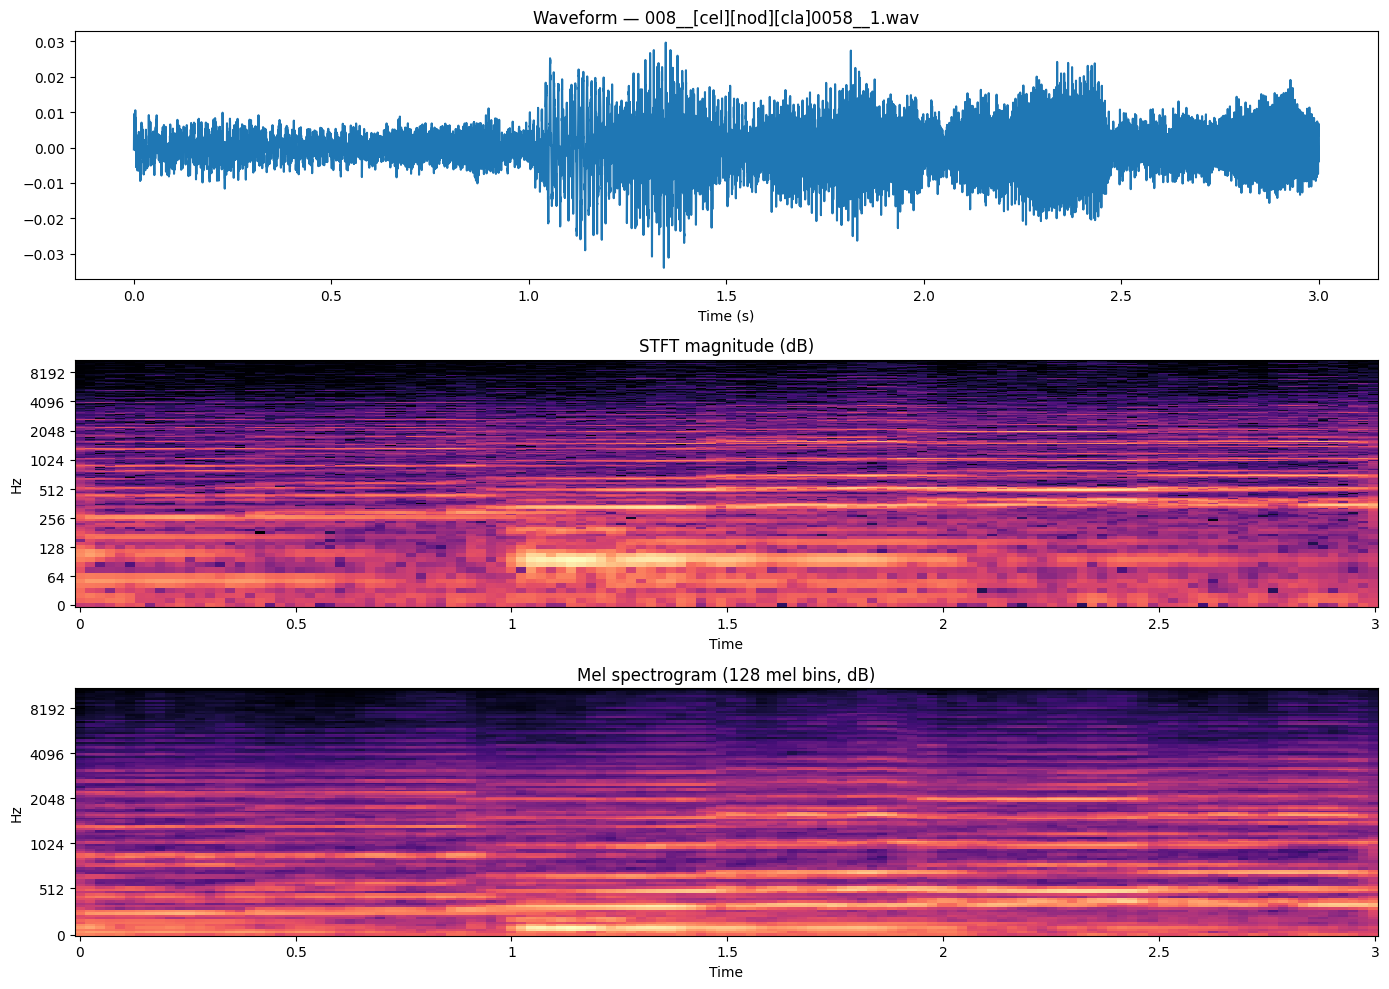

### cla /content/drive/MyDrive/irmas/IRMAS-TrainingData/cla/004__[cla][nod][cla]0242__1.wav


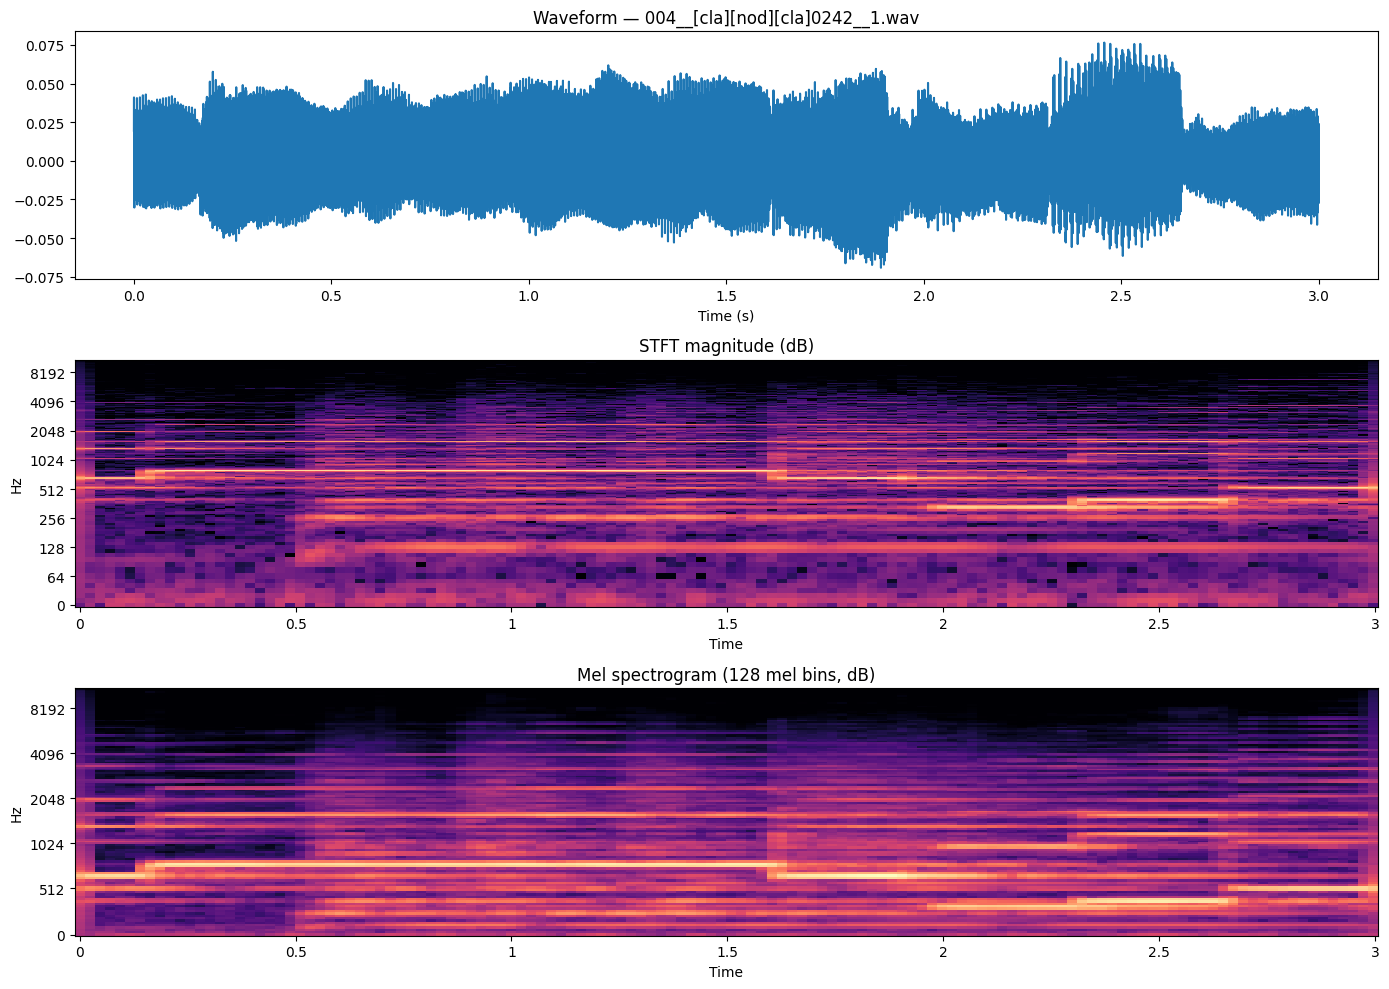

### flu /content/drive/MyDrive/irmas/IRMAS-TrainingData/flu/008__[flu][nod][cla]0393__1.wav


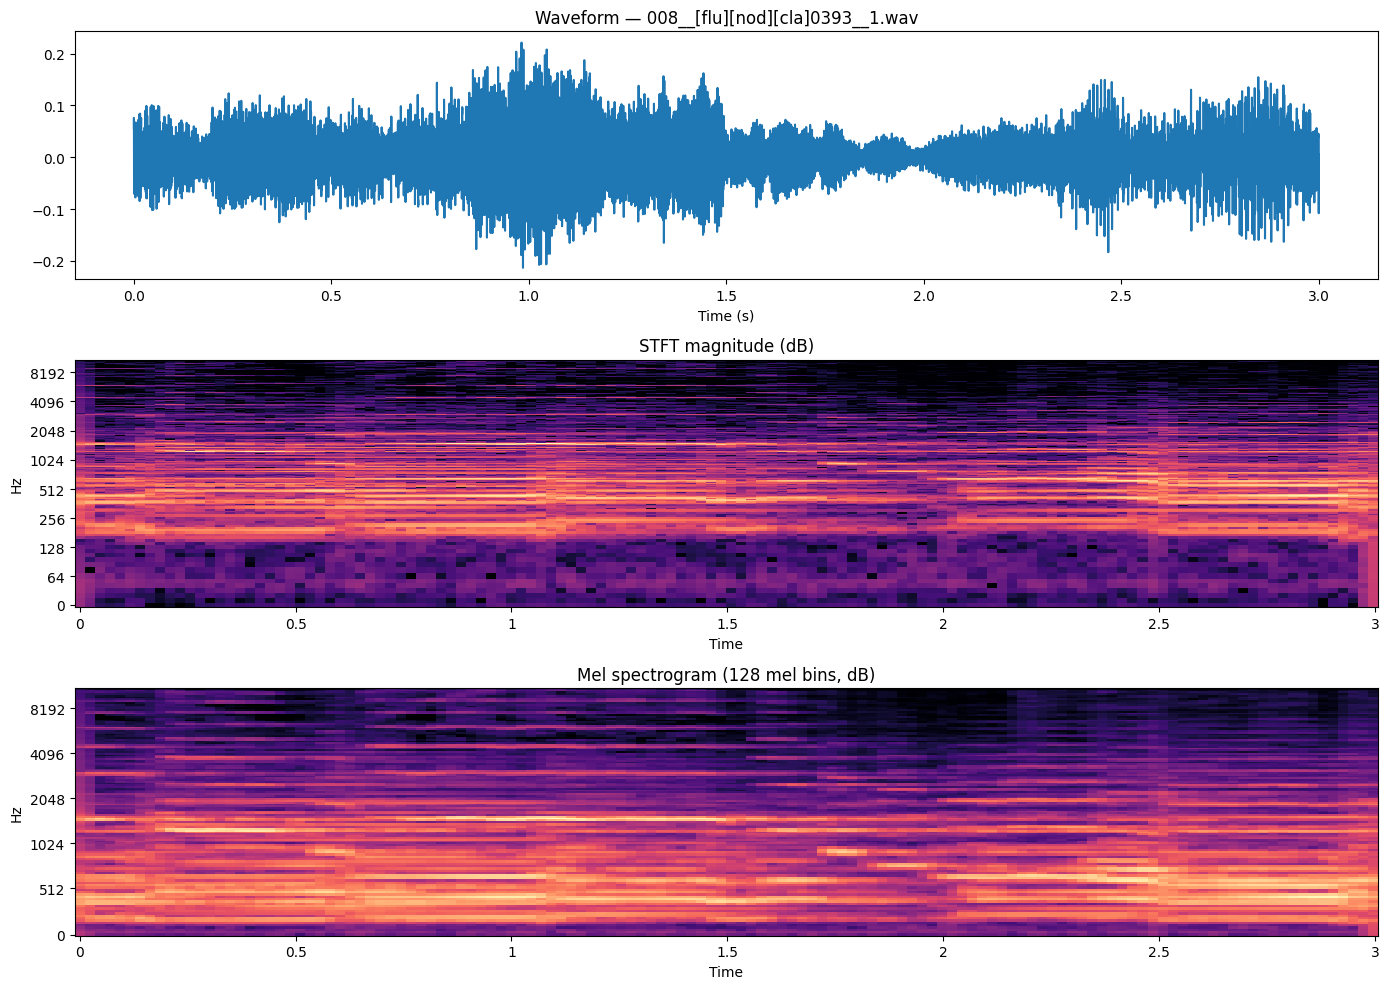

In [ ]:
#Run analysis for each chosen file and show the audio player
results = {}
for inst, fp in files.items():
    print("###", inst, fp)
    results[inst] = analyze_and_plot(fp)
    display(Audio(fp))